In [10]:
import numpy as np
import scipy as sp
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
import numpy as np
import os
import time
import corner
import astropy.io.fits as pyfits
import sys
import argparse
from tqdm import tqdm
import pandas as pd
import gc
import scipy.ndimage
import datetime

In [11]:
rung_fits_path = "/media/joshua/HDD_fun2/time_delay_challenge/rung1/code1/f160w-seed102/"
f = open(rung_fits_path + "lens_info_for_Good_team.txt", "r") 
print(f.read())
print("###############correct answer#############")
with open('/media/joshua/HDD_fun2/time_delay_challenge/rung1_open_box/code1/f160w-seed102/lens_all_info.txt') as f:
    for line in f:
        print(line.strip())

Pixel size is 0.13'' and 0.08'' before and after drizzle
Zeropoint of filter (AB system): 	25.9463
Lens/Source redshift:	[0.834, 2.37]
External Convergence: Kext= 0 +/- 0.025
Measured velocity dispersion: 
	326.49km/s, error level: 15.6km/s
Time delay of BCD - A :
	array([-25.853, -27.017,  -7.388])days, error level: array([ 0.26,  0.27,  0.25])days
###############correct answer#############
Unit:
Length in arcsecond scale, 'phi_G' is Angle in radian system start from x axis anticlockwise.
Cosmological para
FlatLambdaCDM, with Om=0.27 and H0: 74.151km/s/Mpc
Pixel size is 0.13'' and 0.08'' before and after drizzle
Time delay distance: TD_distance=(1+z_l)*D_l*D_s/D_ls:5536.242Mpc
Time delay of BCD - A :
array([-26.732, -28.564,  -7.796])days
Zeropoint of filter (AB system): 	25.9463
Lens/Source redshift:	[0.834, 2.37]
Lens mass model:
SPEMD:{'theta_E': 1.224, 'q': 0.79, 'center_x': 0, 'center_y': 0, 'phi_G': 2.296, 'gamma': 2.093}
Shear: 	({'e1': 0.013, 'e2': 0.027}, {'b': 0.03, 'phi_G':

Filename: /media/joshua/HDD_fun2/time_delay_challenge/rung1/code1/f160w-seed102/drizzled_image/lens-image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (99, 99)   float32   
None
3093.464002966881


/home/joshua/miniconda3/envs/LSST/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log


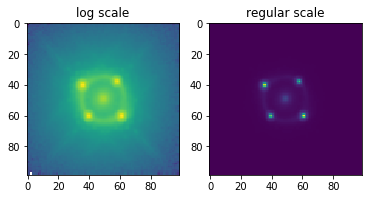

In [12]:
rung_fits_path = "/media/joshua/HDD_fun2/time_delay_challenge/rung1/code1/f160w-seed102/drizzled_image/lens-image.fits"

#files = os.listdir(rung_fits_path)
# for file in files:
#     print(file)
try:
    hdul = fits.open(rung_fits_path)
    print(hdul.info())
    img = hdul['PRIMARY'].data
    print(sum(sum((img))))
    plt.subplot(1, 2, 1)
    plt.imshow(np.log(img))
    plt.title("log scale")
    plt.subplot(1, 2, 2)
    plt.imshow(img)
    plt.title("regular scale")
    plt.show()
except:
    pass


In [13]:
loaded_model_path = './saved_model/2019-08-16power_law_pred_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd()) 


normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor


real_data = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
image = np.zeros((3, 224, 224))
for i in range(3):
    image[i, :, :] += real_data
    

real_data_image = torch.from_numpy(image).float().cuda().unsqueeze(0)

output = net(real_data_image)

output 


#### Note: several things to change (angular resolution in the sims, train with normalized data)

loaded mdl！
/home/joshua/Documents/git_work_zone/time_delay_challenge


tensor([[ 1.2845,  2.1991, -0.1367, -0.0356, -0.0480, -0.0239, -0.0312,  0.0278,
         -0.0071,  2.8616,  0.1711,  0.9521,  0.0409,  0.0911, -0.0216,  0.0461,
         -0.0251,  1.0451]], device='cuda:0', grad_fn=<ThAddmmBackward>)